In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


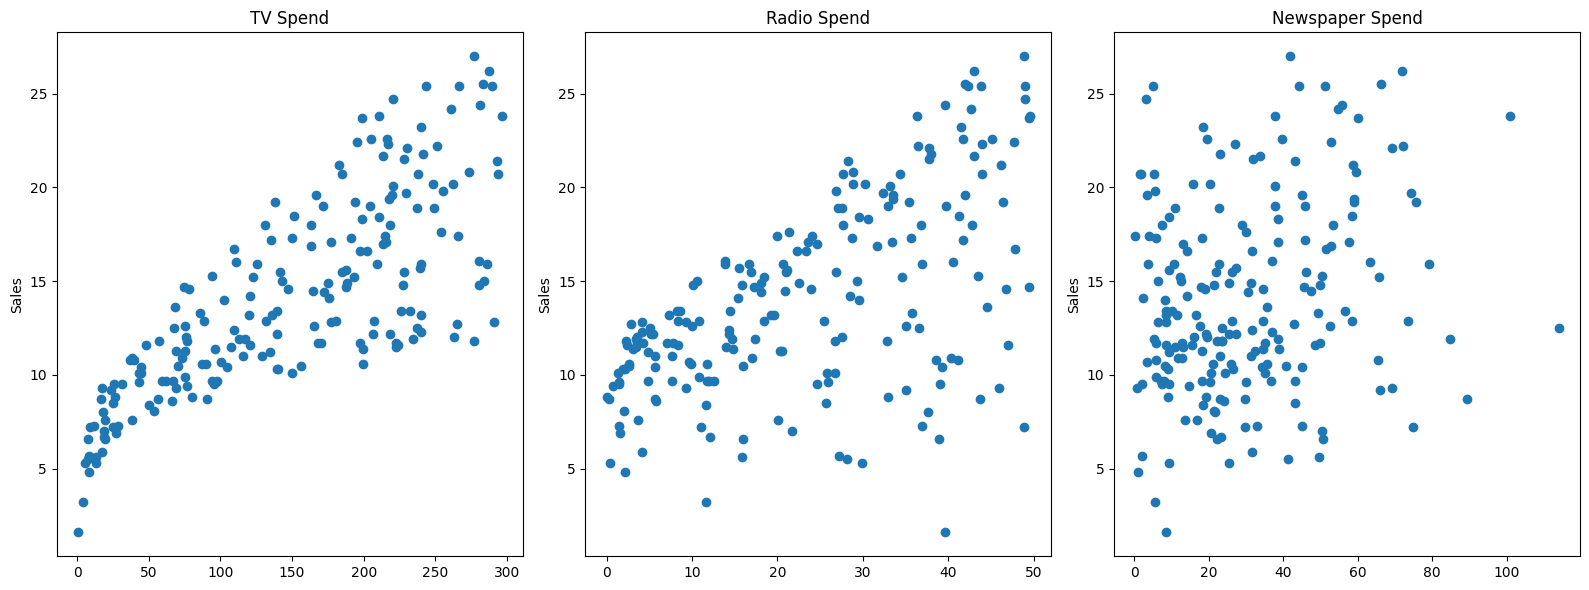

In [4]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

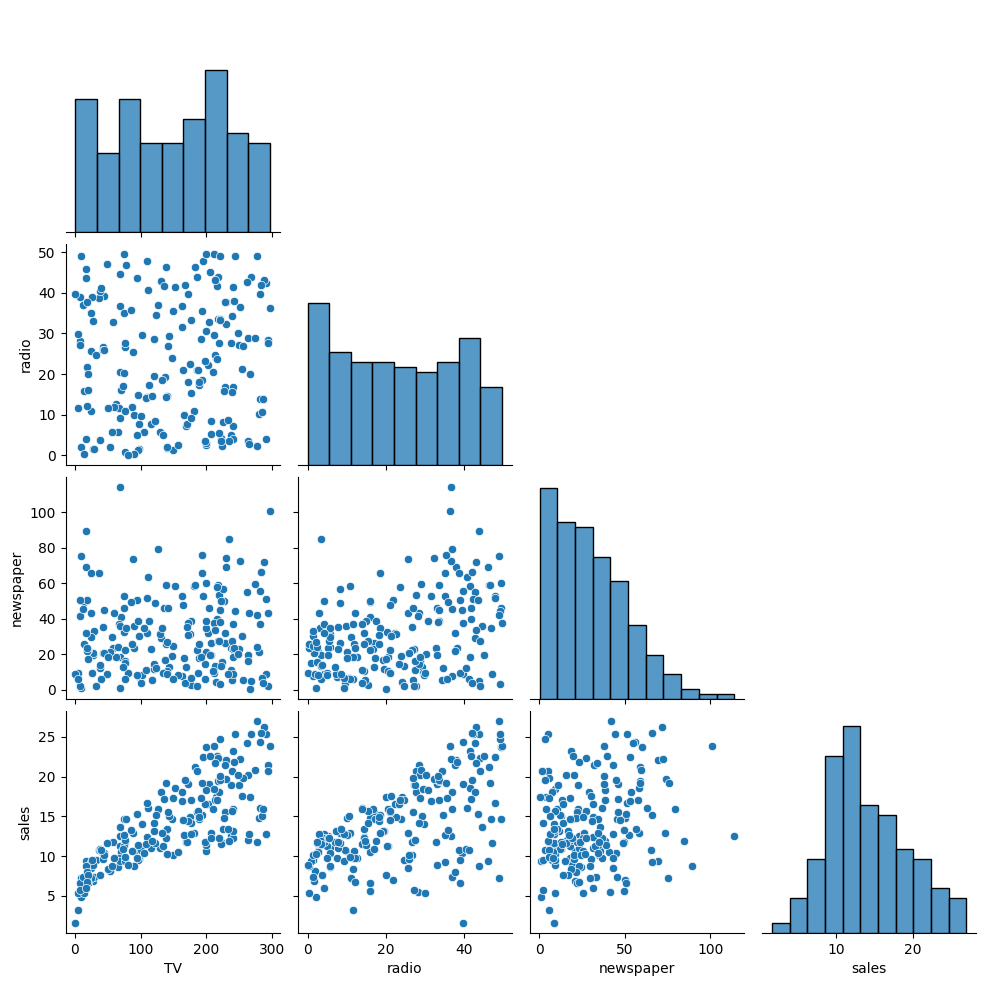

In [5]:
sns.pairplot(df,corner=True)

In [6]:
X = df.drop('sales',axis = 1)

In [7]:
y = df['sales']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [10]:
len(df)

200

In [11]:
len(X_train)

140

In [12]:
len(X_test)

60

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
# help(LinearRegression)

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train,y_train)

LinearRegression()

In [17]:
test_predictions = model.predict(X_test)

In [18]:
X_test.head()

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2


In [19]:
# y_test

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [21]:
df['sales'].mean()

np.float64(14.0225)

<Axes: xlabel='sales', ylabel='Count'>

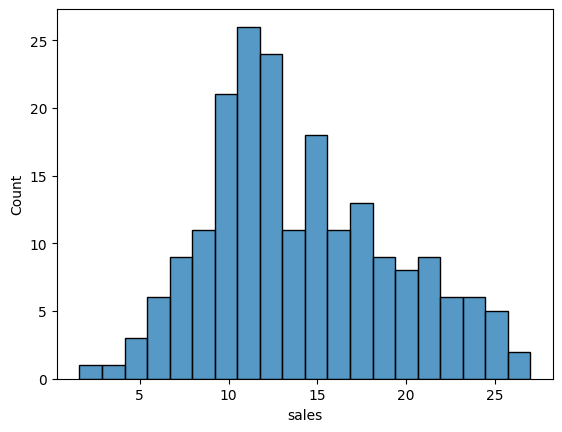

In [22]:
sns.histplot(data=df,x = 'sales',bins =20)

In [23]:
mean_absolute_error(y_test,test_predictions)

1.2137457736144803

In [24]:
#RMSE
np.sqrt(mean_squared_error(y_test,test_predictions))

np.float64(1.5161519375993877)

In [25]:
test_residuals = y_test - test_predictions

In [26]:
# test_residuals

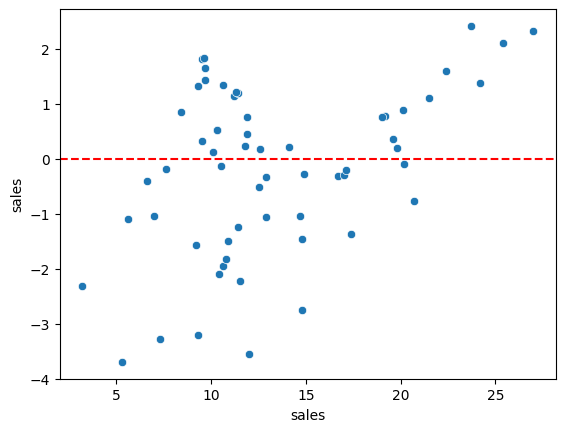

In [27]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color = 'r',ls = '--')

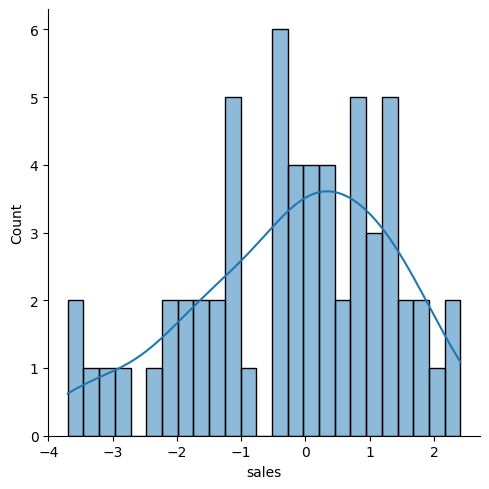

In [28]:
sns.displot(test_residuals,bins=25,kde=True)

In [29]:
import scipy as sp

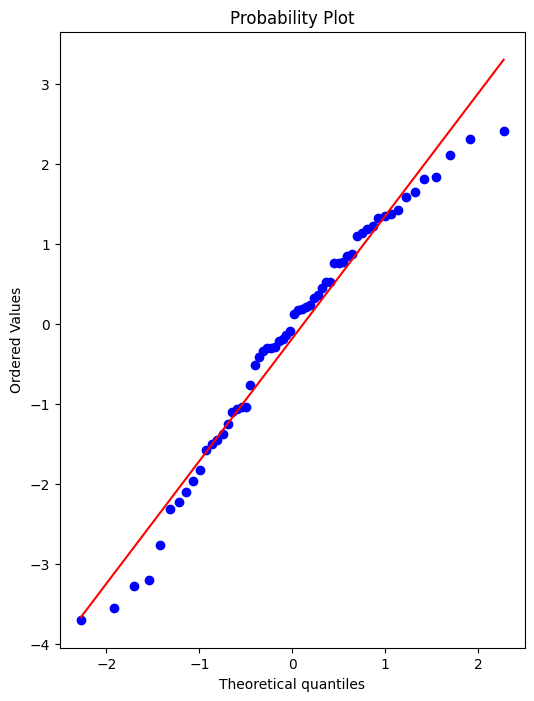

In [30]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_residuals,plot=ax)

In [31]:
final_model = LinearRegression()
final_model

LinearRegression()

In [32]:
final_model.fit(X,y)

LinearRegression()

In [33]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [34]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [35]:
y_hat = final_model.predict(X)

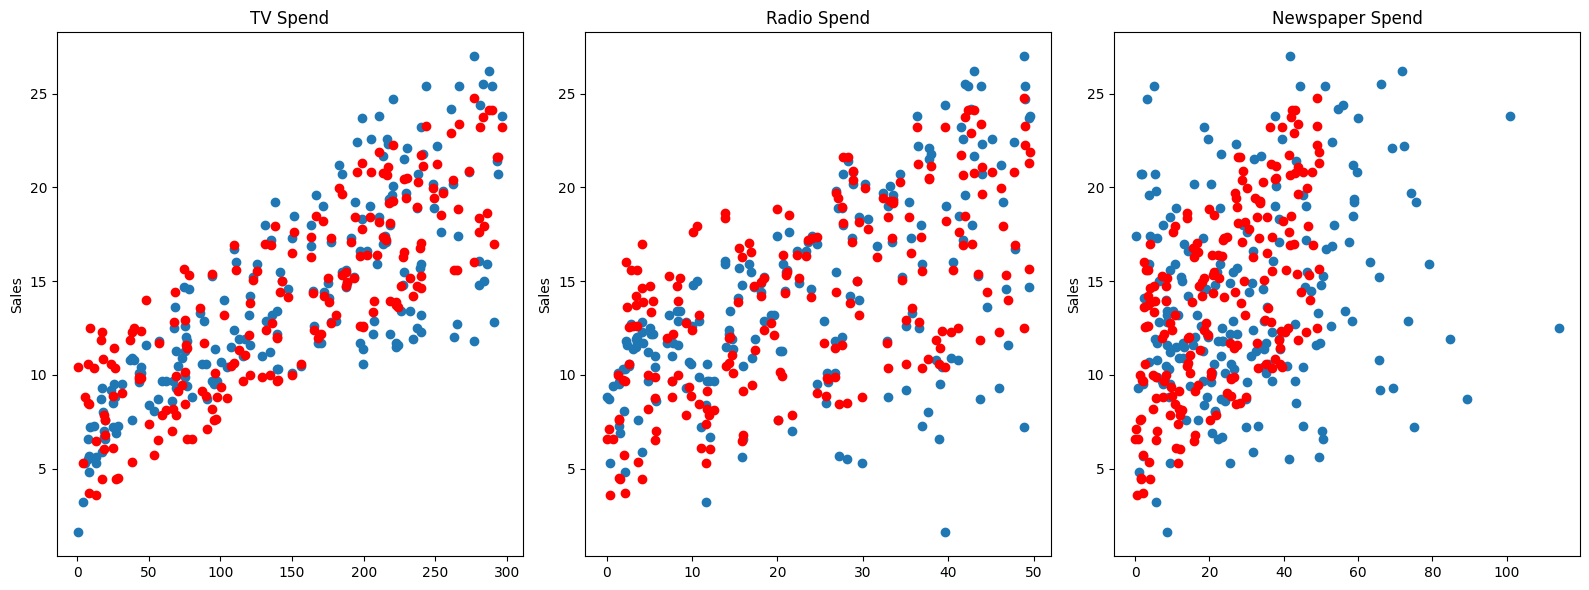

In [36]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [37]:
from joblib import dump,load

In [38]:
dump(final_model,'final_sales_model.joblib')

['final_sales_model.joblib']

In [39]:
loaded_model = load('final_sales_model.joblib')

In [40]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [41]:
X.shape

(200, 3)

In [42]:
#149 TV ,22 Radio , 12 Newspaper
# Sales?

campaign = [[149,22,12]]

In [43]:
loaded_model.predict(campaign)

C:\Users\LENOVO\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])